# Kapittel 15

In [2]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

<>:95: SyntaxWarning: invalid escape sequence '\c'
<>:95: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_7047/2263274417.py:95: SyntaxWarning: invalid escape sequence '\c'
  ax.set_zlabel('Temperatur [$^\circ$C]') # Namn på z-akse


Kor fin oppdeling vil du ha?  4


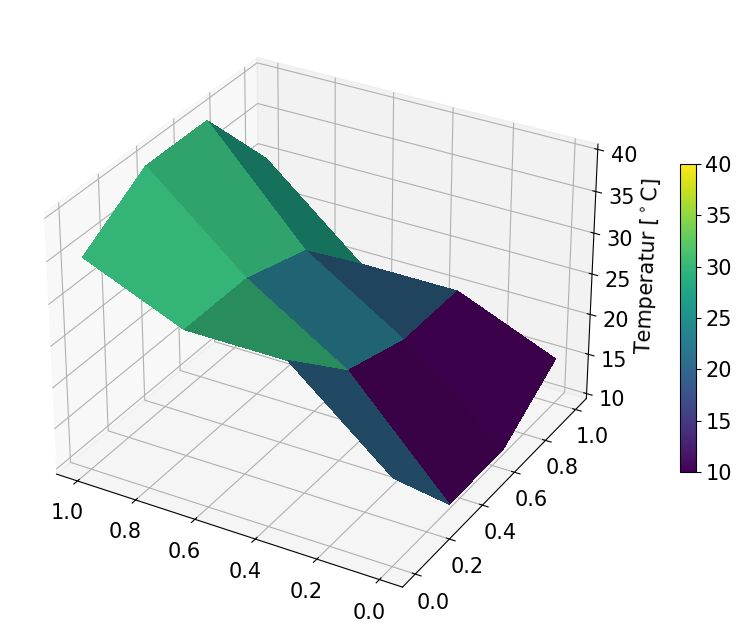

In [6]:
# Temperaturfordeling.m

"""Skript som estimerer temperaturfordelinga

på ei kvadratisk metallplate der temperaturane på
sidekantane er fikserte. Dette gjer den ved å
iterere på temperaturfordelingsmatrisa ved å setje
verdien i kvart element til gjennomsnittet av
nabopunkta. Dette blir gjentatt til dess matrisa
blir praktisk tala uendra ved nye iterasjonar.
"""

# Import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

# Fikserer kanttemperaturar
T_kant_venstre = 10
T_kant_over = 30
T_kant_hoegre = 40
T_kant_under = 20

# Bestemmer feilmarginen gitt ved normen til matrisa.
tol = 1e-2

# Bestemmer inndelinga (blir lest inn frå kommandolinja)
N = int(input('Kor fin oppdeling vil du ha? '))

#
# Set opp startmatrisa
#
# Allokerer temperaturmatrisa T_mat og kopi
T_mat = np.zeros((N, N))
T_mat_gml = np.copy(T_mat)

# Startfordeling med tilfeldige tal frå max til min
# for indre punkt
Min = np.min(np.array([T_kant_venstre, T_kant_over, 
                       T_kant_hoegre, T_kant_under]))
Max = np.max(np.array([T_kant_venstre, T_kant_over, 
                       T_kant_hoegre, T_kant_under]))
T_mat[1:(N-1),1:(N-1)] = np.ones((N-2,N-2)) * \
    Min+(Max-Min)*np.random.random((N-2,N-2))

# Kant-temperaturar
T_mat[1:N-1, 0] = T_kant_venstre
T_mat[0, 1:(N-1)] = T_kant_over
T_mat[1:(N-1), N-1] = T_kant_hoegre
T_mat[N-1, 1:(N-1)] = T_kant_under

# Hjørne-temperaturar (gjennomsnitt)
T_mat[0,0] = (T_kant_venstre+T_kant_over)/2
T_mat[0,N-1] = (T_kant_over+T_kant_hoegre)/2
T_mat[N-1,N-1] = (T_kant_hoegre+T_kant_under)/2
T_mat[N-1,0] = (T_kant_under+T_kant_venstre)/2

# Itererer til det sluttar å endre seg
while np.linalg.norm(T_mat-T_mat_gml) > tol:
    T_mat_gml = np.copy(T_mat)        # Kopierer matrisa
    for r in range(1, N-1):
        for s in range(1, N-1):
            # Omdefinerer temp. til gjennomsnitt
            T_mat[r,s] = (T_mat[r,s-1] + T_mat[r,s+1] + \
                T_mat[r-1,s] + T_mat[r+1,s])/4

#
# Plottar sluttfordelinga
#
# Vektor med verdiar på x- og y-aksane
xy_vektor = np.linspace(0, 1, N)

# Fontstorleik i plotta
plt.rcParams.update({'font.size': 15})

# Lagar eit 2D-grid
X, Y = np.meshgrid(xy_vektor, xy_vektor) 

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection='3d')

# Brukar fargekartet "viridis"
cmap = cm.viridis
# Kobler farger i fargekartet med verdiar i T_mat
norm = colors.Normalize(vmin = np.min(T_mat), 
                        vmax = np.max(T_mat))
col = cmap(norm(T_mat))

# Overflate-plott
surf = ax.plot_surface(X, Y, T_mat, 
                       facecolors=col, linewidth=0,
                       antialiased=False, shade=True)
ax.xaxis.set_inverted(True)
ax.set_zlabel('Temperatur [$^\circ$C]') # Namn på z-akse

# Set på søyle til å forklare fargekode
sc = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sc, ax=ax, shrink=0.5)

plt.show()